# Part 1

In [1]:
import tensorflow as tf

Other imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get the data

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-07-05 11:10:13--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-07-05 11:10:13 (47.9 MB/s) - ‘moore.csv’ saved [2302/2302]



Load in the data

In [4]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [5]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [6]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

Split the data

In [7]:
x = data[:, 0].reshape(-1, 1)
x # making an N x D

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

In [8]:
y = data[:, 1]
y

array([       2300,        3500,        2500,        2500,        4100,
              4500,        8000,        3510,        5000,        8500,
              6500,        9000,       29000,       17500,       29000,
             68000,       11500,       55000,      134000,       22000,
             63000,      190000,      275000,       25000,       16000,
            110000,      375000,       30000,      385000,      730000,
            273000,      553000,      180000,      250000,      600000,
           1000000,     1180235,      310000,     1200000,     1350000,
             35000,      600000,      900000,     2800000,     3100000,
            578977,     2500000,     2500000,      111000,     5500000,
           4300000,    10000000,     7500000,     8800000,     7500000,
           9500000,    13500000,    21000000,    21000000,    27400000,
          21300000,    22000000,    42000000,   191000000,    45000000,
          55000000,   112000000,   400000000,   169000000,   184

Plot the data

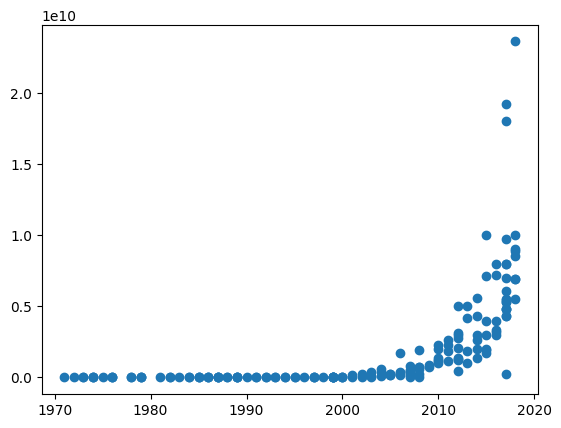

In [9]:
plt.scatter(x, y);

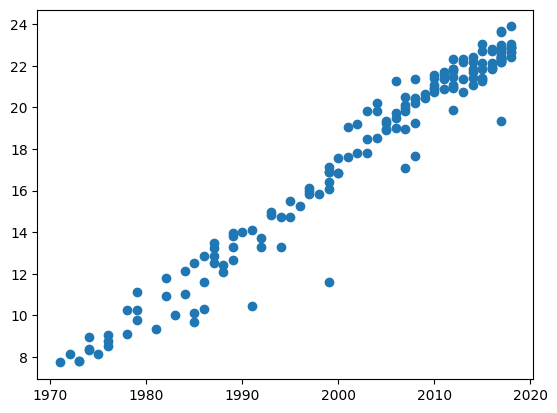

In [10]:
y = np.log(y)
plt.scatter(x, y);

In [11]:
x = x - x.mean()

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(1)
])

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse'
)

In [14]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [15]:
r = model.fit(x, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 408.9794 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 469.3304 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 424.5417 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 277.2032 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 185.8460 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 127.2409 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 86.7960 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 68.8105 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 49.4465 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 43.1553 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 2

Plot the loss

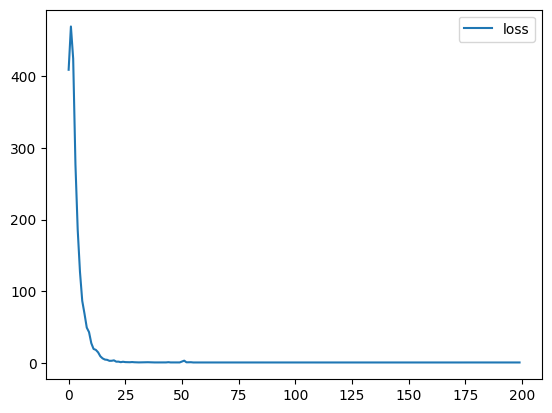

In [16]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [17]:
model.layers

In [18]:
model.layers[0].get_weights()

[array([[0.34751287]], dtype=float32), array([17.767605], dtype=float32)]

In [19]:
a = model.layers[0].get_weights()[0][0, 0]
a

0.34751287

In [20]:
print("Time to double: ", np.log(2) / a)

Time to double:  1.9945942678655653


In [21]:
x = x.flatten()
denominator = x.dot(x) - x.mean() * x.sum()
a = (x.dot(y) - y.mean() * x.sum()) / denominator
b = (y.mean() * x.dot(x) - x.mean() * x.dot(y)) / denominator


In [22]:
print(a, b)

0.341682487387313 17.764939393631764


In [23]:
model.layers[0].get_weights()

[array([[0.34751287]], dtype=float32), array([17.767605], dtype=float32)]

In [24]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.0286295205239204


# Part 2: Making predictions


Make sure the line fits our data

6/6 [==============================] - 0s 3ms/step


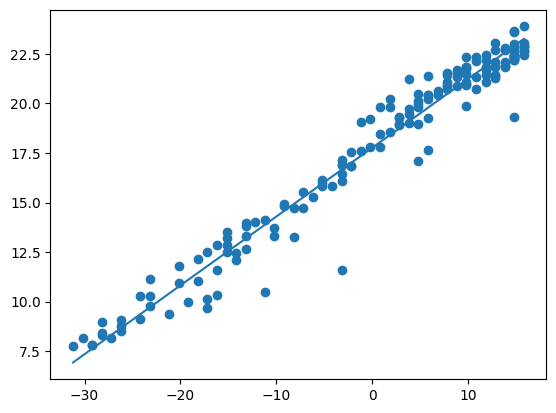

In [27]:
y_hat = model.predict(x).flatten()
plt.scatter(x, y)
plt.plot(x, y_hat);

Manual calculation

In [28]:
# get the weights
w, b = model.layers[0].get_weights()

# reshape x because we flattened it again earlier
x = x.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
y_hat2 = (x.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(y_hat, y_hat2)

True